In [1]:
import pyspark
from pyspark import SparkContext
import pandas as pd

In [2]:
sc=SparkContext()

In [3]:
countries=sc.textFile("/home/hduser/Desktop/Big Data/Dataset/All_Countries.csv")

In [4]:
countries

/home/hduser/Desktop/Big Data/Dataset/All_Countries.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [5]:
countries.top(2)

['Date,Country,Confirmed,Recovered,Deaths',
 '2021-05-24,Zimbabwe,38696,36471,1586']

In [6]:
countries_data=countries.map(lambda x:x.split(','))

In [7]:
countries_data

PythonRDD[3] at RDD at PythonRDD.scala:53

In [8]:
countries_data.count()

93889

In [9]:
countries_data.top(10)

[['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'],
 ['2021-05-24', 'Zimbabwe', '38696', '36471', '1586'],
 ['2021-05-24', 'Zambia', '93279', '91200', '1271'],
 ['2021-05-24', 'Yemen', '6662', '3260', '1310'],
 ['2021-05-24', 'West Bank and Gaza', '305777', '298502', '3470'],
 ['2021-05-24', 'Vietnam', '5404', '2794', '44'],
 ['2021-05-24', 'Venezuela', '224819', '208218', '2528'],
 ['2021-05-24', 'Vanuatu', '4', '3', '1'],
 ['2021-05-24', 'Uzbekistan', '98657', '94143', '680'],
 ['2021-05-24', 'Uruguay', '267888', '230641', '3922']]

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [11]:
spark=SparkSession.builder.appName("COVID -19 Analysis").getOrCreate()

In [12]:
schema=StructType(
    [StructField('Date',DateType(),True),
     StructField('Country',StringType(),True),
     StructField('Confirmed',IntegerType(),True),
     StructField('Recovered',IntegerType(),True),
     StructField('Deaths',IntegerType(),True)
    ]
)

In [13]:
countries_data=spark.read.csv("/home/hduser/Desktop/Big Data/Dataset/All_Countries.csv",header=True,schema=schema)

In [14]:
countries_data

DataFrame[Date: date, Country: string, Confirmed: int, Recovered: int, Deaths: int]

In [15]:
countries_data.show()

+----------+-----------+---------+---------+------+
|      Date|    Country|Confirmed|Recovered|Deaths|
+----------+-----------+---------+---------+------+
|2020-01-22|Afghanistan|        0|        0|     0|
|2020-01-23|Afghanistan|        0|        0|     0|
|2020-01-24|Afghanistan|        0|        0|     0|
|2020-01-25|Afghanistan|        0|        0|     0|
|2020-01-26|Afghanistan|        0|        0|     0|
|2020-01-27|Afghanistan|        0|        0|     0|
|2020-01-28|Afghanistan|        0|        0|     0|
|2020-01-29|Afghanistan|        0|        0|     0|
|2020-01-30|Afghanistan|        0|        0|     0|
|2020-01-31|Afghanistan|        0|        0|     0|
|2020-02-01|Afghanistan|        0|        0|     0|
|2020-02-02|Afghanistan|        0|        0|     0|
|2020-02-03|Afghanistan|        0|        0|     0|
|2020-02-04|Afghanistan|        0|        0|     0|
|2020-02-05|Afghanistan|        0|        0|     0|
|2020-02-06|Afghanistan|        0|        0|     0|
|2020-02-07|

In [16]:
countries_data.count()

93888

In [17]:
countries_data.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Country: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- Deaths: integer (nullable = true)



In [18]:
l1=countries_data.collect()

In [19]:
len(l1)

93888

In [20]:
l2=[]
l2.append(l1[0])
i=0
while i <len(l1):
    t=[l1[i][0],l1[i][1]]
    if l1[i][1]==l1[i-1][1]:
        for j in range(2,5):
            t.append(l1[i][j]-l1[i-1][j])
    else:
        for j in range(2,5):
            t.append(l1[i][j])
    i+=1
    l2.append(t)

In [21]:
countries_data=spark.createDataFrame(l2,schema)

In [22]:
countries_data.createOrReplaceTempView("Countries")

# WHICH COUNTRY HAS THE HIGHEST ACTIVE CASES

In [23]:
spark.sql("SELECT Country,Date,Confirmed FROM Countries WHERE Confirmed=(SELECT max(Confirmed)  FROM Countries)").show()

+-------+----------+---------+
|Country|      Date|Confirmed|
+-------+----------+---------+
| Turkey|2020-12-10|   823225|
+-------+----------+---------+



In [24]:
spark.sql("SELECT Country,Date,Deaths FROM Countries WHERE Deaths=(SELECT max(Deaths)  FROM Countries)").show()

+-------+----------+------+
|Country|      Date|Deaths|
+-------+----------+------+
|  India|2021-05-18|  4529|
+-------+----------+------+



In [25]:
spark.sql("SELECT Country,Date,Recovered FROM Countries WHERE Recovered=(SELECT max(Recovered)  FROM Countries)").show()

+-------+----------+---------+
|Country|      Date|Recovered|
+-------+----------+---------+
| Turkey|2020-12-12|  1123456|
+-------+----------+---------+



# ACTIVE CASES IN INDIA

In [26]:
India_cases=spark.sql("SELECT Confirmed FROM Countries WHERE Country='India'")

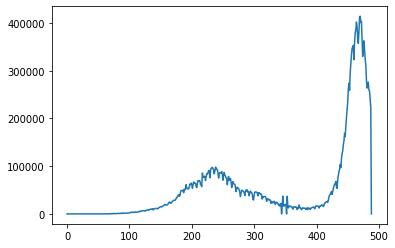

In [27]:
import matplotlib.pyplot as plt
India_cases=India_cases.collect()
plt.plot(India_cases)
plt.show()

# ACTIVE CASES IN INDIA IN LAST 50 DAYS

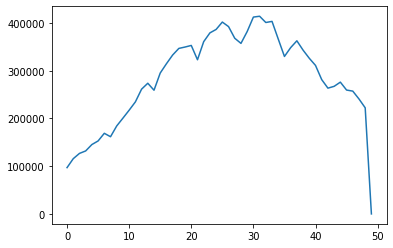

In [28]:
plt.plot(India_cases[-50:])
plt.show()

# DEATHS IN INDIA SINCE LAST YEAR

In [29]:
India_deaths=spark.sql("SELECT Deaths from Countries WHERE Country='India'")

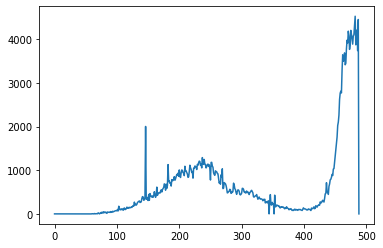

In [30]:
India_deaths=India_deaths.collect()
plt.plot(India_deaths)
plt.show()

# RECOVORED CASES IN INDIA

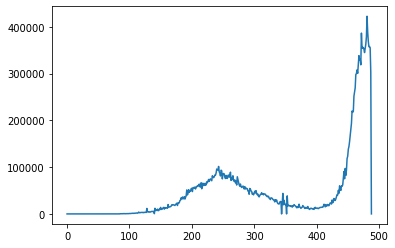

In [31]:
India_recovored=spark.sql("SELECT Recovered FROM Countries WHERE Country='India'")
India_recovored=India_recovored.collect()
plt.plot(India_recovored)
plt.show()

# AVERAGE RECOVORY IN INDIA

In [32]:
avg_recovory=spark.sql("SELECT SUM(Recovered)/COUNT(*) as Average_Recovory FROM Countries WHERE Country='India'")
avg_recovory.show()

+------------------+
|  Average_Recovory|
+------------------+
|48523.539877300616|
+------------------+



# AVERAGE CONFIRMED CASES IN INDIA

In [33]:
avg_cases=spark.sql("SELECT SUM(Confirmed)/COUNT(*) as Average_Cases FROM Countries WHERE Country='India'")
avg_cases.show()

+-----------------+
|    Average_Cases|
+-----------------+
|54708.48057259714|
+-----------------+



In [34]:
print(avg_cases.head()[0]/avg_recovory.head()[0])

1.127462685346867


In [35]:
avg_deaths=spark.sql("SELECT SUM(Deaths)/COUNT(*) as Average_Deaths FROM Countries WHERE Country='India'")
avg_deaths.show()

+-----------------+
|   Average_Deaths|
+-----------------+
|621.1042944785277|
+-----------------+



In [36]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [37]:
from sklearn.model_selection import train_test_split
def split_data(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
    return x_train,y_train,x_test,y_test

In [38]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(scaler,data):
    scaler.fit(data)
    data=scaler.transform(data)
    return data

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

def predict(data):
    scaler=MinMaxScaler(feature_range=(0,1))
    
    data=scale_data(scaler,data)
    
    x,y=create_dataset(data,25)
    
    x_train,y_train,x_test,y_test=split_data(x,y)
    
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    
    x_train=x_train.reshape(x_train.shape[0],25,1)
    x_test=x_test.reshape(x_test.shape[0],25,1)

    model=Sequential()
    model.add(LSTM(512,return_sequences=True,input_shape=(25,1)))
    model.add(LSTM(256,return_sequences=True))
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(64,return_sequences=True))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(16))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    
    print(model.summary())
    print("\n\n\n")
    
    model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=4,batch_size=32,verbose=1)    
    
    y_pred=model.predict(x_test)
    
    error=numpy.sqrt(mean_squared_error(y_test,y_pred))
    
    print("Error : ",error)
    
    y_test=scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred=scaler.inverse_transform(y_pred.reshape(-1,1))
            
    plt.plot(y_test,color='red',label='Actual')
    plt.plot(y_pred,color='yellow',label='Prediction')
    plt.legend()
    plt.show()

(416, 25) (416,) (47, 25) (47,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 512)           1052672   
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 256)           787456    
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 128)           197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 64)            49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25, 32)            12416     
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)           

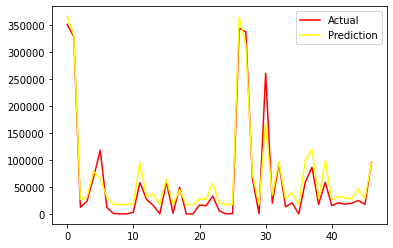

In [40]:
predict(numpy.array(India_recovored))

(416, 25) (416,) (47, 25) (47,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 25, 512)           1052672   
_________________________________________________________________
lstm_7 (LSTM)                (None, 25, 256)           787456    
_________________________________________________________________
lstm_8 (LSTM)                (None, 25, 128)           197120    
_________________________________________________________________
lstm_9 (LSTM)                (None, 25, 64)            49408     
_________________________________________________________________
lstm_10 (LSTM)               (None, 25, 32)            12416     
_________________________________________________________________
lstm_11 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)       

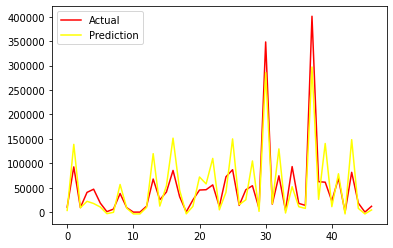

In [41]:
predict(numpy.array(India_cases))

(416, 25) (416,) (47, 25) (47,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 25, 512)           1052672   
_________________________________________________________________
lstm_13 (LSTM)               (None, 25, 256)           787456    
_________________________________________________________________
lstm_14 (LSTM)               (None, 25, 128)           197120    
_________________________________________________________________
lstm_15 (LSTM)               (None, 25, 64)            49408     
_________________________________________________________________
lstm_16 (LSTM)               (None, 25, 32)            12416     
_________________________________________________________________
lstm_17 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)       

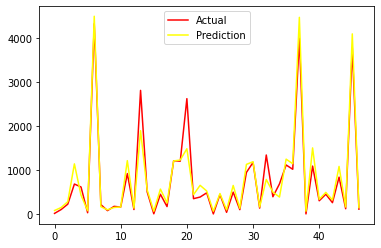

In [42]:
predict(numpy.array(India_deaths))

In [43]:
brazil_covid=sc.textFile("/home/hduser/Desktop/Big Data/Dataset/Brazil_Data.csv")
brazil_population=sc.textFile("/home/hduser/Desktop/Big Data/Dataset/Brazil_Population.csv")

In [44]:
brazil_population,brazil_covid

(/home/hduser/Desktop/Big Data/Dataset/Brazil_Population.csv MapPartitionsRDD[80] at textFile at NativeMethodAccessorImpl.java:0,
 /home/hduser/Desktop/Big Data/Dataset/Brazil_Data.csv MapPartitionsRDD[78] at textFile at NativeMethodAccessorImpl.java:0)

In [45]:
brazil_population=brazil_population.map(lambda x:x.split(','))
brazil_covid=brazil_covid.map(lambda x:x.split(','))

In [46]:
brazil_covid,brazil_population

(PythonRDD[81] at RDD at PythonRDD.scala:53,
 PythonRDD[82] at RDD at PythonRDD.scala:53)

In [47]:
brazil_population.count()

2866

In [48]:
brazil_covid.count()

2356111

In [49]:
brazil_population.top(3)

[['region',
  'state',
  'city',
  'state_code',
  'city_code',
  'health_region_code',
  'health_region',
  'population'],
 ['Sul',
  'Santa Catarina',
  'Águas de Chapecó',
  '42',
  '420050',
  '42002',
  'Oeste',
  '6486'],
 ['Sul',
  'Santa Catarina',
  'Águas Mornas',
  '42',
  '420060',
  '42007',
  'Grande Florianópolis',
  '6469']]

In [50]:
schema=StructType(
    [StructField('region',StringType(),True),
     StructField('state',StringType(),True),
     StructField('city',StringType(),True),
     StructField('state_code',IntegerType(),True),
     StructField('city_code',IntegerType(),True),
     StructField('health_region_code',IntegerType(),True),
     StructField('health_region',StringType(),True),
     StructField('population',IntegerType(),True),
    ]
)

In [51]:
brazil_population_data=spark.read.csv("/home/hduser/Desktop/Big Data/Dataset/Brazil_Population.csv",header=True,schema=schema)

In [52]:
brazil_covid.top(3)

[['date', 'state', 'name', 'code', 'cases', 'deaths'],
 ['2021-05-23', 'TO', 'Xambioá', '172210.0', '2031.0', '27'],
 ['2021-05-23', 'TO', 'Wanderlândia', '172208.0', '772.0', '11']]

In [53]:
schema=StructType(
    [StructField('date',DateType(),True),
     StructField('state',StringType(),True),
     StructField('name',StringType(),True),
     StructField('code',FloatType(),True),
     StructField('cases',FloatType(),True),
     StructField('deaths',IntegerType(),True)
    ]
)

In [54]:
brazil_covid_data=spark.read.csv("/home/hduser/Desktop/Big Data/Dataset/Brazil_Data.csv",header=True,schema=schema)

In [55]:
brazil_covid_data.count()

2356110

In [56]:
brazil_covid_data2=brazil_covid_data.sort('date').sort('name')

In [57]:
brazil_covid_data2.show()

+----------+-----+---------------+--------+------+------+
|      date|state|           name|    code| cases|deaths|
+----------+-----+---------------+--------+------+------+
|2021-05-01|   GO|Abadia de Goiás|520005.0|1251.0|    25|
|2021-05-21|   GO|Abadia de Goiás|520005.0|1351.0|    27|
|2021-05-02|   GO|Abadia de Goiás|520005.0|1253.0|    25|
|2021-04-23|   GO|Abadia de Goiás|520005.0|1235.0|    23|
|2021-05-03|   GO|Abadia de Goiás|520005.0|1253.0|    25|
|2021-04-19|   GO|Abadia de Goiás|520005.0|1210.0|    19|
|2021-05-04|   GO|Abadia de Goiás|520005.0|1275.0|    26|
|2021-04-21|   GO|Abadia de Goiás|520005.0|1223.0|    22|
|2021-05-05|   GO|Abadia de Goiás|520005.0|1286.0|    26|
|2021-04-24|   GO|Abadia de Goiás|520005.0|1239.0|    23|
|2021-05-06|   GO|Abadia de Goiás|520005.0|1287.0|    26|
|2021-04-26|   GO|Abadia de Goiás|520005.0|1239.0|    23|
|2021-05-07|   GO|Abadia de Goiás|520005.0|1290.0|    26|
|2021-04-28|   GO|Abadia de Goiás|520005.0|1247.0|    25|
|2021-05-08|  

In [58]:
brazil_population_data.createOrReplaceTempView("Brazil_Population")

In [59]:
brazil_covid_data.createOrReplaceTempView("Brazil_Cases")

# NUMBER OF STATES IN BRAZIL

In [60]:
spark.sql("SELECT DISTINCT state_code FROM Brazil_Population").count()

27

# NUMBER OF CITIES IN BRAZIL

In [61]:
spark.sql("SELECT DISTINCT city_code FROM Brazil_Population").count()

2865

# POPULATION OF EACH STATE

In [62]:
spark.sql("SELECT state,SUM(population) as Population FROM Brazil_Population GROUP BY(state)").show()

+-------------------+----------+
|              state|Population|
+-------------------+----------+
|     Santa Catarina|   6260519|
| Mato Grosso do Sul|   2063969|
|              Goiás|   5621030|
|        Mato Grosso|   2385097|
|              Ceará|   9040536|
|              Piauí|   2429598|
|     Espírito Santo|   3841551|
|             Paraná|   9018230|
|            Alagoas|   2897092|
|              Bahia|  10755879|
|            Roraima|    593811|
|   Distrito Federal|   3015268|
|         Pernambuco|   9090073|
|           Amazonas|   1480757|
|               Acre|    814380|
|  Rio Grande do Sul|   9243594|
|Rio Grande do Norte|   2966203|
|            Sergipe|   2181265|
|          São Paulo|  44009352|
|     Rio de Janeiro|  17189230|
+-------------------+----------+
only showing top 20 rows



In [63]:
spark.sql("SELECT name,SUM(cases) as Total_Cases FROM Brazil_Cases GROUP BY(name) ORDER BY (Total_Cases)").show()

+--------------------+-----------+
|                name|Total_Cases|
+--------------------+-----------+
|     Cedro do Abaeté|     1498.0|
|           Miravânia|     1925.0|
|          Araguainha|     2742.0|
|           Ubiretama|     2840.0|
|            Serranos|     2990.0|
| Santana do Garambéu|     3109.0|
|      Pedro Teixeira|     3245.0|
|   São João do Pacuí|     3301.0|
|      Sítio d'Abadia|     3381.0|
|            Monjolos|     3633.0|
|        Pedras Altas|     3641.0|
|Santa Rita de Ibi...|     3694.0|
|Dezesseis de Nove...|     3739.0|
| Lagoa Bonita do Sul|     3981.0|
|   Estrela do Indaiá|     4140.0|
|     Oliveira Fortes|     4195.0|
|              Olaria|     4388.0|
|    Serra da Saudade|     4489.0|
|     Bonito de Minas|     4490.0|
|              Calmon|     4518.0|
+--------------------+-----------+
only showing top 20 rows



In [64]:
spark.sql("SELECT date,name,cases,state FROM Brazil_Cases WHERE cases=(SELECT MAX(cases) FROM Brazil_Cases)").show()

+----------+---------+--------+-----+
|      date|     name|   cases|state|
+----------+---------+--------+-----+
|2021-05-23|São Paulo|768868.0|   SP|
+----------+---------+--------+-----+



In [65]:
case_by_date=spark.sql("SELECT SUM(cases) FROM Brazil_Cases Group By(date)")

In [66]:
case_by_date.show()

+-----------+
| sum(cases)|
+-----------+
|  3608650.0|
|  8957381.0|
|  2335384.0|
|  2849006.0|
|  6287458.0|
|    85312.0|
|  3789740.0|
|  3830949.0|
|  4894981.0|
|1.4555934E7|
|1.5324092E7|
|  4638138.0|
|  7131630.0|
|1.4273693E7|
|   345182.0|
|  9823999.0|
|  7079215.0|
|1.2015055E7|
|1.4744656E7|
|  8474214.0|
+-----------+
only showing top 20 rows



In [67]:
from sklearn.linear_model import LinearRegression
def predict_regression(data):
    scaler=MinMaxScaler(feature_range=(0,1))
    
    data=scale_data(scaler,data)
    
    x,y=create_dataset(data,25)
    
    x_train,y_train,x_test,y_test=split_data(x,y)
    
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    print("\n\n\n")
    
    model=LinearRegression()    
    
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_test)
    
    error=numpy.sqrt(mean_squared_error(y_test,y_pred))
    
    print("Error : ",error)
    
    y_test=scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred=scaler.inverse_transform(y_pred.reshape(-1,1))
                
    plt.plot(y_test,color='red',label='Actual')
    plt.plot(y_pred,color='yellow',label='Prediction')
    plt.legend()
    plt.show()

(357, 25) (357,) (40, 25) (40,)




Error :  0.2613639032111739


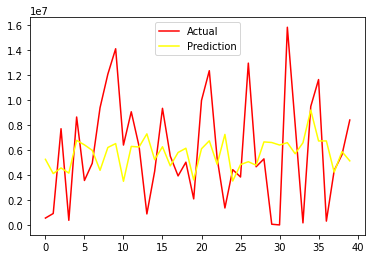

In [68]:
Brazil_Case=case_by_date.collect()
predict_regression(numpy.array(Brazil_Case))

In [69]:
death_by_date=spark.sql("SELECT SUM(deaths) FROM Brazil_Cases Group By(date)")

(357, 25) (357,) (40, 25) (40,)




Error :  0.29221645626579595


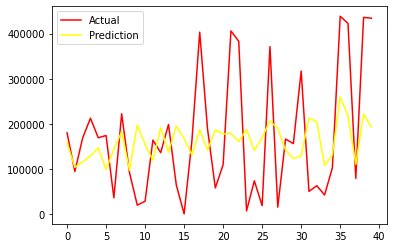

In [70]:
Brazil_Death=death_by_date.collect()
predict_regression(numpy.array(Brazil_Death))

In [71]:
cases_by_date_city=spark.sql("SELECT SUM(cases) FROM Brazil_Cases WHERE name = 'Calmon' Group By(date)")

(357, 25) (357,) (40, 25) (40,)




Error :  0.27571851539579795


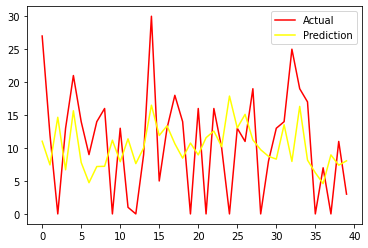

In [72]:
Calmon_Case=cases_by_date_city.collect()
predict_regression(numpy.array(Calmon_Case))

In [73]:
death_by_date_city=spark.sql("SELECT SUM(cases) FROM Brazil_Cases WHERE name = 'Calmon' Group By(date)")

(357, 25) (357,) (40, 25) (40,)




Error :  0.30456282579671384


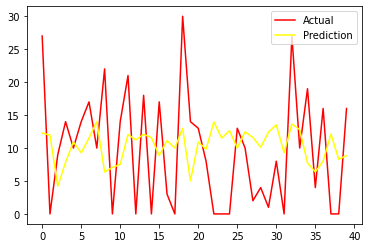

In [74]:
Calmon_Death=death_by_date_city.collect()
predict_regression(numpy.array(Calmon_Death))

In [77]:
sc.stop()

In [78]:
spark.stop()